In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from deepface import DeepFace as df
from retinaface import RetinaFace as m
from PIL import Image
import imagehash

576 576


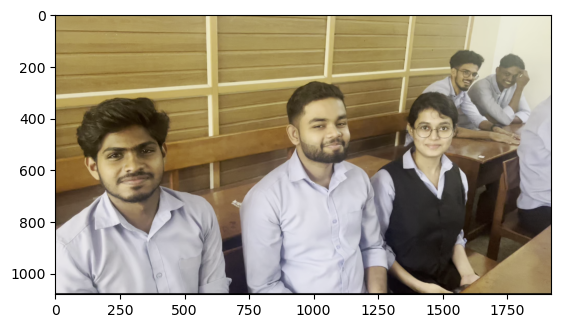

In [4]:
video = cv2.VideoCapture('Data/Video/input2.mov')
count = 0
frames_arr = []
while video.isOpened():
    ret, frame = video.read()

    if not ret:
        break
    frames_arr.append(frame)                                         # Frames stored in frames_arr
    count += 1
video.release()
print(len(frames_arr), count)


img = frames_arr[0]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
frames = []
frames.append(frames_arr[0])
for i in range(1, len(frames_arr)):
    
    orb = cv2.ORB_create()
    
    keypoints1, descriptors1 = orb.detectAndCompute(frames[-1], None)
    keypoints2, descriptors2 = orb.detectAndCompute(frames_arr[i], None)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    matches = bf.match(descriptors1, descriptors2)
    
    matches = sorted(matches, key=lambda x: x.distance)
    
    if len(matches) < 300:
        frames.append(frames_arr[i])
print(len(frames))

192


In [7]:
image_directory = "Data/known_faces"

file_list = os.listdir(image_directory)

paths = [os.path.join(image_directory, file) for file in file_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

#print(paths)
names = []
for path in paths:
    
    name=path[17:-4]
    names.append(name)
#print()
#print(names)

known_faces = []
for i in range(len(names)):
    known_faces.append([paths[i], names[i]])
print()
for i in range(len(known_faces)):
    print(known_faces[i][1])


Abiram_C
Akshay_P
Amal_G
Ameeza
Ameeza1
Ameeza2
Anagha_A_S
Anusree
Ardra
Ardra1
Arjun_CM
Arjun_PJ1
Arjun_P_J
Arjun_V
Ashish
Ashni_Chinnu
Ashni_Chinnu1
Aslam
Aswanth_K
Aswanth_K1
Aswathi_P_V
Aswathi_P_V1
Athira
Athul_Benny
A_Nafih
A_Nafih1
Devanarayan_S_R
Devanarayan_S_R1
Devika_J
Devika_J1
Devika_J2
Faizan_T_P
Fathih_A_F
Jyothish_P_S
Krishnendu
Muhammed_Asad
Neha_P
Nivya
Ramnath_S
Sayooj
Sayooj1
Sreeraj_E_K
Sreeraj_E_K1
Thejus_M
Tona_Antony
Veekshitha_C_H
Veenus
Vyshnav_K1
Vyshna_S
Yadu_Krishna
Yadu_Krishna1


In [95]:
model=df.find(img_path=frames[0],db_path='Data/known_faces',model_name="Facenet",distance_metric="euclidean",enforce_detection=False,normalization="Facenet")

There are  53  representations found in  representations_facenet.pkl
find function lasts  0.7847366333007812  seconds


[Empty DataFrame
 Columns: [identity, source_x, source_y, source_w, source_h, Facenet_euclidean]
 Index: [],
                       identity  source_x  source_y  source_w  source_h  \
 0   Data/known_faces/Ardra.jpg      1370       368       189       189   
 1  Data/known_faces/Ardra1.jpg      1370       368       189       189   
 
    Facenet_euclidean  
 0           7.039602  
 1           7.789861  ,
                                 identity  source_x  source_y  source_w  \
 0   Data/known_faces/Devanarayan_S_R.jpg       954       340       228   
 1  Data/known_faces/Devanarayan_S_R1.jpg       954       340       228   
 
    source_h  Facenet_euclidean  
 0       228           6.194295  
 1       228           7.041760  ,
                             identity  source_x  source_y  source_w  source_h  \
 0        Data/known_faces/Amal_G.jpg       141       422       313       313   
 1     Data/known_faces/Aswanth_K.jpg       141       422       313       313   
 2    Data/known_f

In [53]:
%%time
detected_faces = []
count = 1
for frame in frames[:10]:
    obj = m.detect_faces(frame)
    if isinstance(obj, dict):
        for key in obj.keys():
            faceid = obj[key]
            area = faceid['facial_area']
            x1,y1,x2,y2=area
            extracted_face=frame[y1:y2,x1:x2]
            extracted_face=cv2.cvtColor(extracted_face,cv2.COLOR_BGR2RGB)
            detected_faces.append(extracted_face)

CPU times: total: 1min 54s
Wall time: 29.7 s


In [91]:
print(obj)

{'face_1': {'score': 0.9996127486228943, 'facial_area': [1123, 330, 1248, 481], 'landmarks': {'right_eye': [1157.5492, 389.30005], 'left_eye': [1215.408, 391.907], 'nose': [1184.711, 423.84073], 'mouth_right': [1159.4991, 441.25772], 'mouth_left': [1208.6388, 443.22073]}}, 'face_2': {'score': 0.9995386600494385, 'facial_area': [1372, 195, 1449, 285], 'landmarks': {'right_eye': [1397.4642, 226.63512], 'left_eye': [1430.6256, 239.27632], 'nose': [1407.8654, 252.99188], 'mouth_right': [1387.667, 258.30902], 'mouth_left': [1414.8932, 268.40527]}}, 'face_3': {'score': 0.999504566192627, 'facial_area': [63, 359, 262, 585], 'landmarks': {'right_eye': [118.47968, 455.2787], 'left_eye': [213.03558, 442.0221], 'nose': [174.02402, 494.3312], 'mouth_right': [136.70721, 533.4197], 'mouth_left': [216.81511, 522.3893]}}, 'face_4': {'score': 0.9994124174118042, 'facial_area': [1706, 211, 1812, 336], 'landmarks': {'right_eye': [1763.3657, 252.00998], 'left_eye': [1800.3578, 258.25143], 'nose': [1790.20

In [80]:
%%time
detected=[]
detected_faces=[]
for frame in frames:
    detected.append(df.extract_faces(frame))
for i in range(len(detected)):
    detected_faces.append(detected[i][1]['face'])



CPU times: total: 6min 2s
Wall time: 1min 23s


In [87]:
print(detected)

[[{'face': array([[[0.3137255 , 0.30588236, 0.23921569],
        [0.3137255 , 0.30588236, 0.23921569],
        [0.3137255 , 0.30588236, 0.23921569],
        ...,
        [0.45882353, 0.45490196, 0.38039216],
        [0.4627451 , 0.45882353, 0.38431373],
        [0.        , 0.        , 0.        ]],

       [[0.3137255 , 0.30588236, 0.23921569],
        [0.3137255 , 0.30588236, 0.23921569],
        [0.3137255 , 0.30588236, 0.23921569],
        ...,
        [0.45882353, 0.45490196, 0.38039216],
        [0.4627451 , 0.45882353, 0.38431373],
        [0.        , 0.        , 0.        ]],

       [[0.3137255 , 0.30588236, 0.23921569],
        [0.3137255 , 0.30588236, 0.23921569],
        [0.3137255 , 0.30588236, 0.23921569],
        ...,
        [0.4627451 , 0.45490196, 0.38431373],
        [0.46666667, 0.4627451 , 0.38431373],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.6313726 , 0.54509807, 0.38431373],
        [0.6313726 , 0.54509807, 0.38431373],
        [0.

In [83]:
print(len(detected_faces))

192


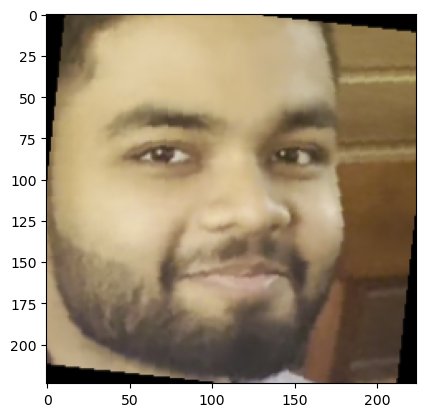

In [93]:
plt.imshow(detected_faces[2])

In [85]:
faces = []
faces.append(cv2.convertScaleAbs(detected_faces[0]))

for i in range(1, len(detected_faces)):
    img2 = cv2.convertScaleAbs(detected_faces[i])

    orb = cv2.ORB_create()

    keypoints1, descriptors1 = orb.detectAndCompute(faces[-1], None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    if descriptors2 is None:
        
        continue

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(descriptors1, descriptors2)

    matches = sorted(matches, key=lambda x: x.distance)

    if len(matches) < 300:
        faces.append(detected_faces[i])
print(len(faces))

1


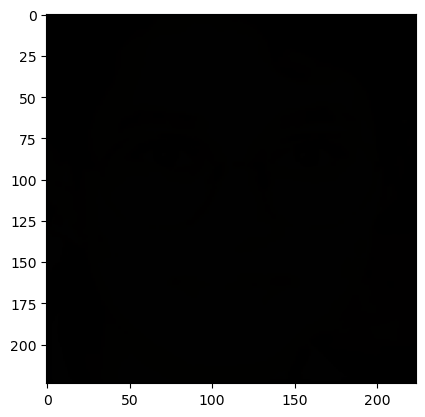

In [86]:
plt.imshow(faces[0])

In [92]:
%%time
models=[]
res=[]
count=0
for i in range(len(detected_faces)):
    model=df.find(img_path=detected_faces[i],db_path='Data/known_faces',model_name="Facenet",distance_metric="euclidean",enforce_detection=False,normalization="Facenet")
    models.append(model)
    if len(models[i][0]) > 0:
        res.append(models[i][0]['identity'].values[0][17:-4])
        print(count," ",models[i][0]['identity'].values[0][17:-4])
    count+=1
res=list(set(res))
print()
for i in range(len(res)):
    print(i+1,res[i])

There are  53  representations found in  representations_facenet.pkl
find function lasts  0.9305891990661621  seconds
0   Ardra
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.12050986289978027  seconds
1   Amal_G
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10658979415893555  seconds
2   Devanarayan_S_R
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10554718971252441  seconds
3   Amal_G
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10091972351074219  seconds
4   Devanarayan_S_R
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10425305366516113  seconds
5   Ardra
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10045146942138672  seconds
6   Amal_G
There are  53  representations found in  representations_facenet.pkl
find f

There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10122966766357422  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08878731727600098  seconds
24   Ardra
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10613298416137695  seconds
25   Krishnendu
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11022090911865234  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08965563774108887  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.09369158744812012  seconds
28   Krishnendu
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.0969691276550293  seconds
29   Krishnendu
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.09103822708129883

find function lasts  0.14168167114257812  seconds
46   Krishnendu
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08918118476867676  seconds
47   Anusree
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11170077323913574  seconds
48   Krishnendu
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11843228340148926  seconds
49   Krishnendu
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.1096506118774414  seconds
50   Krishnendu
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11516451835632324  seconds
51   Krishnendu
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11428356170654297  seconds
52   Krishnendu
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.1111598014831543  seconds
There are 

find function lasts  0.14728093147277832  seconds
70   Ameeza2
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.14231061935424805  seconds
71   Ameeza2
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10311675071716309  seconds
72   Arjun_P_J
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.09271669387817383  seconds
73   Arjun_P_J
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11887192726135254  seconds
74   Tona_Antony
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.12705421447753906  seconds
75   Arjun_P_J
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.1499481201171875  seconds
76   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11831378936767578  seconds
77   Veenus
There 

find function lasts  0.11275291442871094  seconds
93   Tona_Antony
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08906245231628418  seconds
94   Arjun_P_J
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08986616134643555  seconds
95   Ashni_Chinnu1
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10355114936828613  seconds
96   Ameeza2
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.09138035774230957  seconds
97   Tona_Antony
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08812355995178223  seconds
98   Ashni_Chinnu1
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10671520233154297  seconds
99   Ameeza2
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11378121376037598  seconds
100 

find function lasts  0.1040945053100586  seconds
116   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10779738426208496  seconds
117   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11353898048400879  seconds
118   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11252427101135254  seconds
119   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08706021308898926  seconds
120   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08602261543273926  seconds
121   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11187100410461426  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08575296401977539  seconds
There are  53  representations found in 

find function lasts  0.12150096893310547  seconds
138   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.10558700561523438  seconds
139   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11254405975341797  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11185264587402344  seconds
141   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11188960075378418  seconds
142   Veenus
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.1073908805847168  seconds
143   Tona_Antony
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08812928199768066  seconds
144   Tona_Antony
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08953976631164551  seconds
145   Tona_Antony
There are  5

find function lasts  0.11788082122802734  seconds
161   Arjun_P_J
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.12462472915649414  seconds
162   Arjun_P_J
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08712887763977051  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.09099555015563965  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08538484573364258  seconds
165   Arjun_PJ1
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11058592796325684  seconds
166   Akshay_P
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.09017801284790039  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08478093147277832  seconds
There are  53  representations found in  representatio

find function lasts  0.0892329216003418  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11255812644958496  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.1217808723449707  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.1233663558959961  seconds
187   Tona_Antony
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.11110091209411621  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08689188957214355  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.08893489837646484  seconds
There are  53  representations found in  representations_facenet.pkl
find function lasts  0.09003067016601562  seconds
191   Aswathi_P_V1

1 A_Nafih
2 Fathih_A_F
3 Tona_Antony
4 Vyshna_S
5 Amal_G
6 Akshay_P
7 Anusree
8 Kr

In [48]:
model

[                                identity  source_x  source_y  source_w  \
 0   Data/known_faces/Devanarayan_S_R.jpg         0         0       161   
 1  Data/known_faces/Devanarayan_S_R1.jpg         0         0       161   
 
    source_h  Facenet_euclidean  
 0       195           6.835918  
 1       195           7.616445  ]

In [10]:
# res = set()
# count = 0
# for face in detected_faces:
#     print(count)
#     for path, name in known_faces:
#         print(name)
#         img = cv2.imread(path)
#         obj = df.verify(img, face, enforce_detection=False)
#         if obj['verified']:
#             print(name + "verfied")
#             if name not in res:
#                 res.add(name)
#             break
#     print()
# res = list(res)
# for i in range(len(res)):
#     print(i+1, res[i])

0
Abiram_C
Abiram_Cverfied

0
Abiram_C
Akshay_P
Amal_G
Ameeza
Ameezaverfied

0
Abiram_C
Abiram_Cverfied

0
Abiram_C
Akshay_P
Amal_G
Ameeza
Ameeza1
Ameeza1verfied

0
Abiram_C
Abiram_Cverfied

0
Abiram_C
Akshay_P
Amal_G
Ameeza
Ameezaverfied

0
Abiram_C
Abiram_Cverfied

0
Abiram_C
Abiram_Cverfied

0
Abiram_C
Akshay_P
Amal_G
Ameeza
Ameeza1
Ameeza2
Anagha_A_S
Anusree
Ardra
Ardra1
Arjun_CM
Arjun_PJ1
Arjun_P_J
Arjun_V
Ashish
Ashni_Chinnu
Ashni_Chinnu1
Aslam
Aswanth_K
Aswanth_K1
Aswathi_P_V
Aswathi_P_Vverfied

0
Abiram_C
Abiram_Cverfied

0
Abiram_C
Akshay_P
Amal_G
Ameeza
Ameezaverfied

0
Abiram_C
Abiram_Cverfied

0
Abiram_C
Akshay_P
Amal_G
Ameeza
Ameeza1
Ameeza2
Anagha_A_S
Anusree
Ardra
Ardraverfied

0
Abiram_C
Abiram_Cverfied

0
Abiram_C
Abiram_Cverfied

0
Abiram_C
Akshay_P
Amal_G
Ameeza
Ameezaverfied

0
Abiram_C
Akshay_P
Amal_G
Ameeza
Ameeza1
Ameeza2
Anagha_A_S
Anusree
Ardra
Ardra1
Arjun_CM
Arjun_PJ1
Arjun_P_J
Arjun_V
Ashish
Ashni_Chinnu
Ashni_Chinnu1
Aslam
Aswanth_K
Aswanth_K1
Aswathi_P_V
A

In [16]:
df.verify(detected_faces[1], 'Data/known_faces/Ameeza.jpg', enforce_detection=False)

{'verified': True,
 'distance': 0.38463775459332983,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 83, 'h': 85},
  'img2': {'x': 88, 'y': 364, 'w': 1049, 'h': 1049}},
 'time': 0.73}